<br><br><br>
# Questions
* Should we include engine_id and cycle in our dataset?

<br><br><br>

# 1. Import data, libaries and define global variables

In [69]:
import pandas as pd
import numpy as np
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [8]:
cd C:\Users\Paulo\Documents\GitHub\business-analytics-3\data

C:\Users\Paulo\Documents\GitHub\business-analytics-3\data


In [9]:
df_training = pickle.load( open( "df_training.pkl", "rb" ) )
df_predict  = pickle.load( open( "df_predict.pkl", "rb" ) )

<br><br>
# 2. Split df_training

In [23]:
def createTrainAndTestSet(df, test_size, random_state = 1):
    """
    This function splits the data into a train and test set.
    """
    
    X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], 
                                                        df[df.columns[-1:]], 
                                                        test_size    = test_size, 
                                                        random_state = random_state)
    
    return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test = createTrainAndTestSet(df        = df_training, 
                                                         test_size = 0.20)

print('{} shape: {}'.format('X_train', X_train.shape))
print('{} shape: {}'.format('y_train', y_train.shape))
print('\n')
print('{} shape: {}'.format('X_test', X_test.shape))
print('{} shape: {}'.format('y_test', y_test.shape))

X_train shape: (16504, 18)
y_train shape: (16504, 1)


X_test shape: (4127, 18)
y_test shape: (4127, 1)


In [36]:
X_train.head()

,engine_id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
14054,70,62,0.644125,-1.372953,-0.321841,0.286557,0.723993,0.036482,0.047171,-0.221577,-0.266467,0.225792,-0.224597,-0.135917,-0.814459,0.509675,0.684563,0.375938
19733,96,182,0.598406,1.698142,0.998051,0.095724,0.045133,-0.166892,-0.516338,-0.571178,-0.229025,0.157999,-0.502695,-0.326736,0.252090,0.509675,0.020633,0.064617
8586,44,142,-2.281909,0.333211,-0.501826,-0.259846,0.037356,-0.121698,0.610680,0.298748,0.707021,-0.262320,0.609696,0.141399,0.244091,-0.136018,0.131288,-0.499827
2582,13,37,-1.870436,0.674444,-0.001867,-1.295566,0.389563,0.239855,-0.516338,-0.667635,-0.229025,0.605435,-0.363646,-0.608770,-0.254521,-0.781710,-0.421986,-0.956185
13054,66,138,0.278371,1.356910,0.898059,0.342013,0.018468,-0.347668,0.892435,-0.201199,0.781905,-0.506376,0.887794,-0.216648,0.526726,1.155367,0.131288,-1.193602


<br><br>
# 3. Predictors

In [66]:
# Define LinearRegression and fit it to our X_train, and y_train data
reg = LinearRegression()
reg.fit(X = X_train, y = y_train)

# Print out MAE, R2 and RMSE
#### FILL IN ####
print('R2 score: {}. \n'.format(reg.score(X = X_train, y = y_train)))

# Print out coefficients
coefDataFrame = pd.DataFrame(reg.coef_[0], X_train.columns, columns=['Coefficients'])
print('Coefficients:')
display(coefDataFrame)

# Plot the results

R2 score: 0.6664733576174661. 

Coefficients:


,Coefficients
engine_id,0.286353
cycle,-0.417279
setting1,0.071531
setting2,0.665072
s2,-2.846815
s3,-1.437814
s4,-4.633318
s7,3.366926
s8,-1.938865
s9,-4.802952


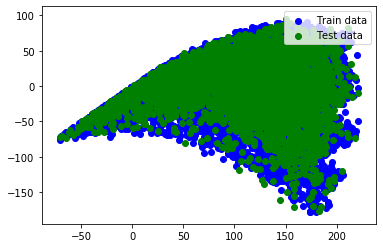

In [96]:
# Error in training data
train_pred = reg.predict(X_train)
train_diff = train_pred - y_train

# Error in test data
test_pred  = reg.predict(X_test)
test_diff  = test_pred  - y_test

# Plot the predictions
plt.scatter(train_pred, train_diff, color = 'blue', label = 'Train data')
plt.scatter(test_pred, test_diff, color = 'green', label = 'Test data')
plt.legend(loc = 'upper right') 
plt.show()